In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('brisbane_water_quality.csv')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30894 entries, 0 to 30893
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Timestamp                                 30894 non-null  object 
 1   Record number                             30894 non-null  int64  
 2   Average Water Speed                       30874 non-null  float64
 3   Average Water Direction                   30893 non-null  float64
 4   Chlorophyll                               30309 non-null  float64
 5   Chlorophyll [quality]                     30086 non-null  float64
 6   Temperature                               25730 non-null  float64
 7   Temperature [quality]                     25550 non-null  float64
 8   Dissolved Oxygen                          26594 non-null  float64
 9   Dissolved Oxygen [quality]                26370 non-null  float64
 10  Dissolved Oxygen (%Saturation)    

In [42]:
df.shape

(30894, 20)

## Preprocessing

In [43]:
# Drop columns with quality information
df = df.drop(columns=['Dissolved Oxygen [quality]', 'Chlorophyll [quality]', 'Temperature [quality]',
                      'Dissolved Oxygen (%Saturation) [quality]', 'pH [quality]', 'Salinity [quality]',
                      'Specific Conductance [quality]', 'Turbidity [quality]', 'Record number'], errors='ignore')

In [44]:
df.shape

(30894, 11)

In [45]:
# Convert 'Timestamp' column to datetime 
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [46]:
df.head

<bound method NDFrame.head of                 Timestamp  Average Water Speed  Average Water Direction  \
0     2023-08-04 23:00:00                4.834                   73.484   
1     2023-08-04 23:30:00                2.544                  106.424   
2     2023-08-04 23:00:00                1.260                  156.755   
3     2023-08-04 23:30:00                0.760                  281.754   
4     2023-08-04 23:00:00                3.397                  244.637   
...                   ...                  ...                      ...   
30889 2024-06-27 08:20:00               13.314                   82.720   
30890 2024-06-27 08:30:00               32.617                   18.081   
30891 2024-06-27 08:40:00                8.552                  306.184   
30892 2024-06-27 08:50:00               10.341                   24.711   
30893 2024-06-27 09:00:00               11.173                  241.662   

       Chlorophyll  Temperature  Dissolved Oxygen  \
0            1.6

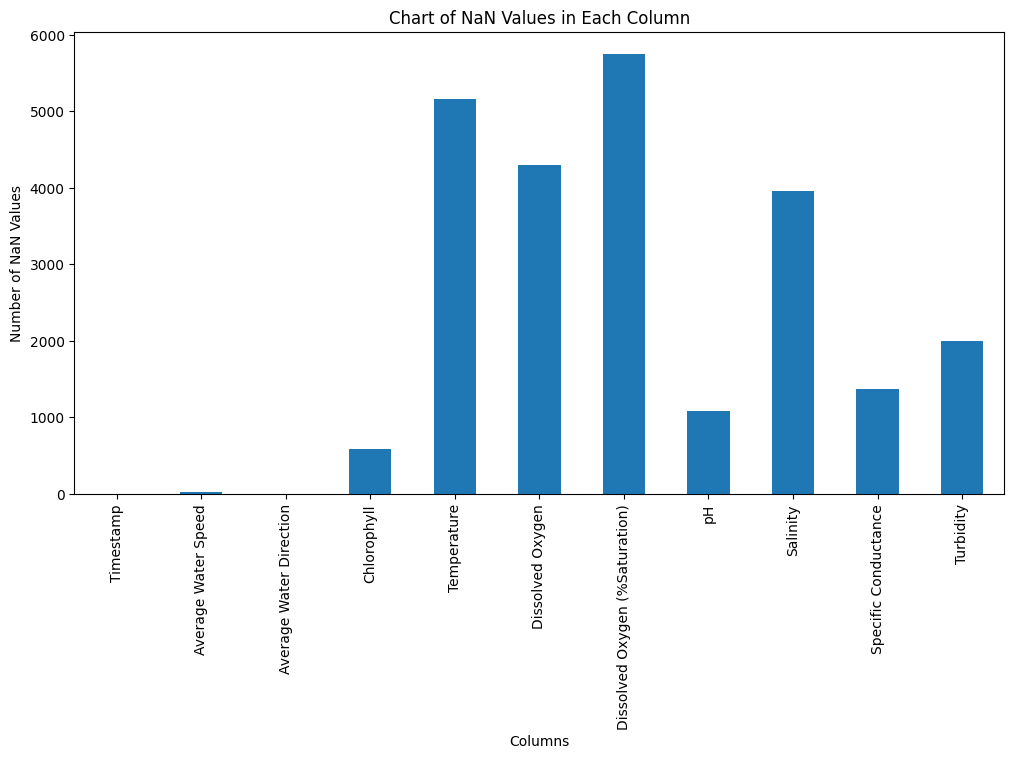

In [47]:
null_sum = df.isnull().sum()

# Plot histogram of NaN values
plt.figure(figsize=(12, 6))
null_sum.plot(kind='bar')
plt.title('Chart of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')
plt.show()

Outliers detected:
Average Water Speed: 414 outliers
Chlorophyll: 349 outliers
Dissolved Oxygen: 205 outliers
Dissolved Oxygen (%Saturation): 260 outliers
pH: 42 outliers
Salinity: 343 outliers
Specific Conductance: 363 outliers
Turbidity: 579 outliers


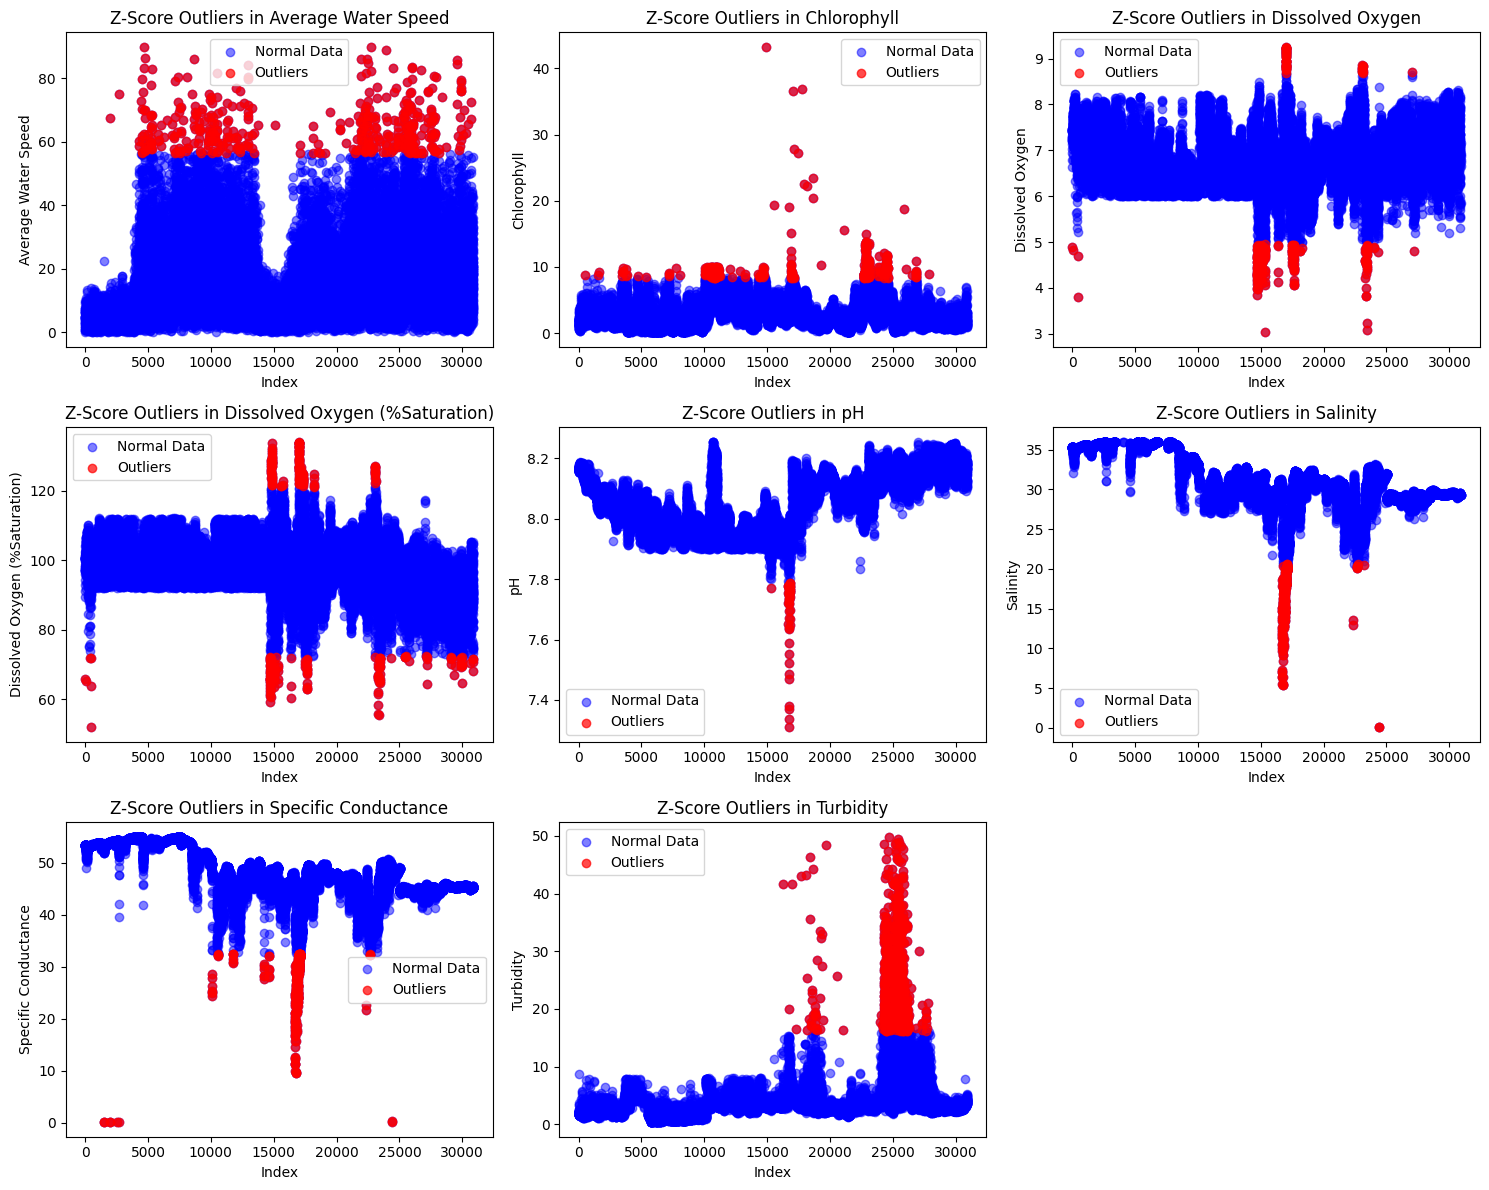


Original DataFrame shape: (30894, 11)


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to detect outliers using Z-score
def detect_outliers_zscore(df, threshold=3):
    outlier_counts = {}
    outlier_indices = {}

    for col in df.select_dtypes(include=[np.number]).columns:  # Only check numeric columns
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        outliers = df[z_scores >= threshold]
        if not outliers.empty:  # Only store columns with actual outliers
            outlier_counts[col] = len(outliers)
            outlier_indices[col] = outliers.index  # Store indices for plotting

    return outlier_counts, outlier_indices

# Function to plot Z-score outliers in a grid layout
def plot_zscore_outliers(df, outlier_indices):
    cols_with_outliers = list(outlier_indices.keys())
    num_cols = len(cols_with_outliers)

    if num_cols == 0:
        print("No outliers detected to plot.")
        return

    # Set grid size (aiming for a square or balanced layout)
    cols_per_row = min(3, num_cols)  # Max 3 columns per row
    rows = (num_cols // cols_per_row) + (num_cols % cols_per_row > 0)

    fig, axes = plt.subplots(rows, cols_per_row, figsize=(5 * cols_per_row, 4 * rows))
    axes = np.array(axes).flatten()  # Flatten in case of 1D or asymmetric layout

    for ax, col in zip(axes, cols_with_outliers):
        ax.scatter(df.index, df[col], label="Normal Data", color="blue", alpha=0.5)
        ax.scatter(outlier_indices[col], df.loc[outlier_indices[col], col], label="Outliers", color="red", alpha=0.7)
        ax.set_title(f"Z-Score Outliers in {col}")
        ax.set_xlabel("Index")
        ax.set_ylabel(col)
        ax.legend()

    # Hide any unused subplots
    for i in range(num_cols, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Example usage:
# Detect and print outliers for all numeric columns
outliers_info, outlier_indices = detect_outliers_zscore(df)
print("Outliers detected:")
for col, count in outliers_info.items():
    print(f"{col}: {count} outliers")

# Plot detected outliers in a grid layout
plot_zscore_outliers(df, outlier_indices)

# Print shape before and after outlier removal
print("\nOriginal DataFrame shape:", df.shape)


In [49]:
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfYear'] = df['Timestamp'].dt.dayofyear
df['Month'] = df['Timestamp'].dt.month

df.head()

,Timestamp,Average Water Speed,Average Water Direction,Chlorophyll,Temperature,Dissolved Oxygen,Dissolved Oxygen (%Saturation),pH,Salinity,Specific Conductance,Turbidity,Hour,DayOfYear,Month
0,2023-08-04 23:00:00,4.834,73.484,1.621,20.018,7.472,101.175,8.176,35.215,53.262,2.068,23,216,8
1,2023-08-04 23:30:00,2.544,106.424,1.959,19.986,7.455,100.884,8.175,35.209,53.254,1.994,23,216,8
2,2023-08-04 23:00:00,1.260,156.755,1.620,20.001,7.430,100.571,8.171,35.207,53.252,2.030,23,216,8
3,2023-08-04 23:30:00,0.760,281.754,1.761,19.983,7.419,100.398,8.171,35.211,53.257,1.973,23,216,8
4,2023-08-04 23:00:00,3.397,244.637,1.635,19.986,7.429,100.538,8.171,35.208,53.253,1.944,23,216,8


In [50]:
duplicate_timestamps = df[df.duplicated(subset=['Timestamp'], keep=False)]
if not duplicate_timestamps.empty:
    print("Duplicate timestamps exist:")
    print(duplicate_timestamps)
else:
    print("No duplicate timestamps found.")

Duplicate timestamps exist:
                Timestamp  Average Water Speed  Average Water Direction  \
0     2023-08-04 23:00:00                4.834                   73.484   
1     2023-08-04 23:30:00                2.544                  106.424   
2     2023-08-04 23:00:00                1.260                  156.755   
3     2023-08-04 23:30:00                0.760                  281.754   
4     2023-08-04 23:00:00                3.397                  244.637   
...                   ...                  ...                      ...   
30459 2024-06-24 09:00:00               23.286                  102.621   
30603 2024-06-25 09:00:00                5.070                   29.750   
30604 2024-06-25 09:00:00                5.070                   29.750   
30748 2024-06-26 09:00:00               42.538                  212.200   
30749 2024-06-26 09:00:00               42.538                  212.200   

       Chlorophyll  Temperature  Dissolved Oxygen  \
0            1.621

In [51]:
# Remove duplicate timestamps by averaging values for duplicate timestamps
df.set_index('Timestamp', inplace=True)
df = df.groupby(df.index).mean()

df.shape

(30614, 13)

In [52]:
# Check for negative values in each column
negative_counts = (df < 0).sum()

print("Columns with negative values:")
print(negative_counts)


Columns with negative values:
Average Water Speed               0
Average Water Direction           0
Chlorophyll                       0
Temperature                       0
Dissolved Oxygen                  0
Dissolved Oxygen (%Saturation)    0
pH                                0
Salinity                          0
Specific Conductance              0
Turbidity                         0
Hour                              0
DayOfYear                         0
Month                             0
dtype: int64


In [53]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median') 

# Fit the imputer on the DataFrame's numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Check for missing values after imputation
df.isnull().sum()

Average Water Speed               0
Average Water Direction           0
Chlorophyll                       0
Temperature                       0
Dissolved Oxygen                  0
Dissolved Oxygen (%Saturation)    0
pH                                0
Salinity                          0
Specific Conductance              0
Turbidity                         0
Hour                              0
DayOfYear                         0
Month                             0
dtype: int64

In [54]:
from scipy import stats  # Import the stats module from scipy

def remove_outliers_zscore(df, threshold=3):
    df_no_outliers = df.copy()
    columns_to_exclude = ['Hour', 'DayOfYear', 'Month']  # Columns to exclude from outlier removal

    for col in df.select_dtypes(include=np.number):
        if col not in columns_to_exclude:  # Check if the column should be processed
            z_scores = np.abs(stats.zscore(df[col]))
            df_no_outliers = df_no_outliers[z_scores < threshold]

    return df_no_outliers

# Example usage
df = remove_outliers_zscore(df)
df.shape

/var/folders/1n/ylr_6rmd60dg7hjwyhs4rpfr0000gn/T/ipykernel_26152/2646819493.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df_no_outliers[z_scores < threshold]
/var/folders/1n/ylr_6rmd60dg7hjwyhs4rpfr0000gn/T/ipykernel_26152/2646819493.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df_no_outliers[z_scores < threshold]
/var/folders/1n/ylr_6rmd60dg7hjwyhs4rpfr0000gn/T/ipykernel_26152/2646819493.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df_no_outliers[z_scores < threshold]
/var/folders/1n/ylr_6rmd60dg7hjwyhs4rpfr0000gn/T/ipykernel_26152/2646819493.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df_no_outliers[z_scores < threshold]
/var/folders/1n/ylr_6rmd60dg7hjwyhs4rpfr0000gn/T/ipykernel_26152/2646819493.py:10: UserWarning: Boolean Series key will be reindexed to matc

(28502, 13)

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Scale the data and convert back to DataFrame
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)

# Now you can use DataFrame methods
df.head()

,Average Water Speed,Average Water Direction,Chlorophyll,Temperature,Dissolved Oxygen,Dissolved Oxygen (%Saturation),pH,Salinity,Specific Conductance,Turbidity,Hour,DayOfYear,Month
Timestamp,,,,,,,,,,,,,
2023-08-04 23:00:00,-1.120456,-0.323561,-0.603827,-1.428923,1.178197,0.603918,1.201306,1.409796,1.122769,-0.669970,1.664538,0.484837,0.592563
2023-08-04 23:30:00,-1.075374,-0.006426,-0.453122,-1.437394,1.170822,0.588776,1.189980,1.411576,1.124315,-0.704747,1.664538,0.484837,0.592563
2023-08-05 00:00:00,-0.585918,-1.208621,-0.768132,-1.472007,1.213500,0.607401,1.088043,1.427221,1.137813,-0.674244,-1.659720,0.493278,0.592563
2023-08-05 00:30:00,-1.102803,-0.812174,-0.774458,-1.477637,1.189023,0.577398,1.167327,1.427922,1.138266,-0.693350,-1.659720,0.493278,0.592563
2023-08-05 01:00:00,-0.526051,-1.198428,-0.732709,-1.488271,1.204086,0.584133,1.189980,1.431425,1.141433,-0.704412,-1.515187,0.493278,0.592563


In [56]:
from sklearn.decomposition import PCA
import pandas as pd
# Perform PCA
pca = PCA(n_components=0.95)
df = pca.fit_transform(df)
df = pd.DataFrame(df)  # Use the original column names
df.shape


(28502, 9)

In [57]:
# Specify the file path and name
name = 'preprocessed_water_quality.csv'  # Change 'your_dataframe.csv' to your desired file name

# Save the DataFrame to a CSV file
df.to_csv(name, index=True)  # Set index=False if you don't want to save the index

print(f"DataFrame successfully saved to {name}")

DataFrame successfully saved to preprocessed_water_quality.csv


## Model Training


Clustering Metrics:
Silhouette Score: 0.189
Calinski-Harabasz Index: 5488.710
Davies-Bouldin Index: 1.519

Number of clusters: 5

Cluster distribution:
0     6419
1    13585
2     5251
3     1521
4     1726
Name: count, dtype: int64


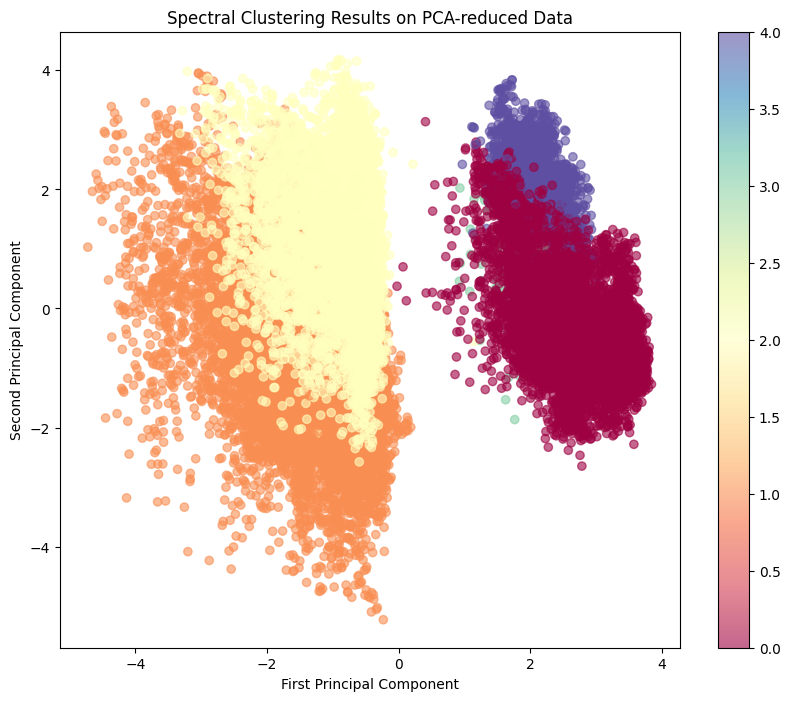


Cluster Characteristics:

Cluster 0:
0    2.699589
1   -0.377524
2    0.214743
3    0.491465
4   -0.229398
5    0.077380
6   -0.078627
7   -0.093808
8   -0.485480
dtype: float64

Cluster 1:
0   -1.398534
1   -0.592494
2    0.655260
3   -0.046015
4    0.043821
5   -0.108311
6    0.069193
7   -0.031971
8    0.165940
dtype: float64

Cluster 2:
0   -1.006948
1    1.176593
2   -1.987459
3    0.080612
4   -0.066374
5    0.162919
6    0.156634
7    0.042160
8   -0.171033
dtype: float64

Cluster 3:
0    2.172008
1    0.456504
2   -0.723979
3   -1.180840
4    0.573247
5   -0.172209
6   -0.758462
7    0.331108
8    0.562977
dtype: float64

Cluster 4:
0    2.117196
1    2.085589
2    0.728380
3   -0.670237
4    0.204996
5    0.220825
6   -0.060341
7    0.180467
8    0.523643
dtype: float64


In [58]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt
# Convert all column names to strings
df.columns = df.columns.astype(str)

# Create Spectral Clustering model
n_clusters = 5  # You can adjust this
spectral = SpectralClustering(n_clusters=n_clusters,
                             affinity='nearest_neighbors',
                             random_state=42)

# Fit and predict clusters
clusters = spectral.fit_predict(df)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

# Calculate metrics
silhouette = silhouette_score(df.drop('Cluster', axis=1), clusters)
calinski = calinski_harabasz_score(df.drop('Cluster', axis=1), clusters)
davies = davies_bouldin_score(df.drop('Cluster', axis=1), clusters)

print("\nClustering Metrics:")
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz Index: {calinski:.3f}")
print(f"Davies-Bouldin Index: {davies:.3f}")

# Print basic clustering information
print(f"\nNumber of clusters: {n_clusters}")
print("\nCluster distribution:")
print(pd.Series(clusters).value_counts().sort_index())

# Visualize clusters using first two components
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df.iloc[:, 0], df.iloc[:, 1], 
                     c=clusters, 
                     cmap='Spectral',
                     alpha=0.6)
plt.colorbar(scatter)
plt.title('Spectral Clustering Results on PCA-reduced Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# Print cluster characteristics
print("\nCluster Characteristics:")
for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(cluster_data.mean().drop('Cluster'))



/Users/edw/Desktop/cluster-water/.venv/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(



Clustering Metrics:
Silhouette Score: 0.236
Calinski-Harabasz Index: 8290.505
Davies-Bouldin Index: 1.561

Number of clusters: 5

Cluster distribution:
0    3235
1    6423
2    7589
3    5289
4    5966
Name: count, dtype: int64


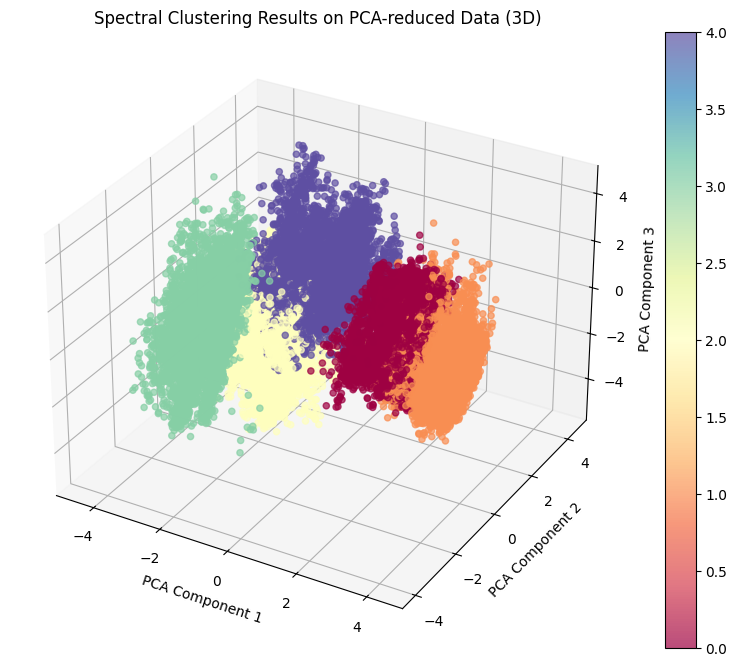


Cluster Characteristics:

Cluster 0:
0    2.144414
1    1.327553
2    0.053259
3   -0.907660
4    0.379192
5    0.034069
6   -0.387058
7    0.245279
8    0.542193
dtype: float64

Cluster 1:
0    2.698988
1   -0.375989
2    0.215490
3    0.490835
4   -0.229956
5    0.077754
6   -0.079508
7   -0.092497
8   -0.485458
dtype: float64

Cluster 2:
0   -1.280872
1   -1.389809
2    0.036121
3   -0.246409
4    0.056100
5   -0.115118
6   -0.101309
7   -0.018055
8    0.204599
dtype: float64

Cluster 3:
0   -1.012507
1    1.175675
2   -1.972430
3    0.077974
4   -0.067718
5    0.184901
6    0.144455
7    0.035493
8   -0.167015
dtype: float64

Cluster 4:
0   -1.541585
1    0.410570
2    1.441783
3    0.208052
4    0.030629
5   -0.119668
6    0.296283
7   -0.041916
8    0.116451
dtype: float64


In [61]:
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Convert all column names to strings (if necessary)
df.columns = df.columns.astype(str)

# Apply PCA to reduce data to 3D for visualization
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df)

# Create Spectral Clustering model
n_clusters = 5  # You can adjust this
spectral = SpectralClustering(n_clusters=n_clusters,
                             affinity='nearest_neighbors',
                             random_state=42)

# Fit and predict clusters
clusters = spectral.fit_predict(df)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

# Calculate clustering evaluation metrics
silhouette = silhouette_score(df, clusters)
calinski = calinski_harabasz_score(df, clusters)
davies = davies_bouldin_score(df, clusters)

print("\nClustering Metrics:")
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz Index: {calinski:.3f}")
print(f"Davies-Bouldin Index: {davies:.3f}")

# Print basic clustering information
print(f"\nNumber of clusters: {n_clusters}")
print("\nCluster distribution:")
print(pd.Series(clusters).value_counts().sort_index())

# 3D Visualization of Clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of PCA-reduced data
scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], 
                      c=clusters, cmap='Spectral', alpha=0.7)

ax.set_title('Spectral Clustering Results on PCA-reduced Data (3D)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.colorbar(scatter)
plt.show()

# Print cluster characteristics
print("\nCluster Characteristics:")
for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(cluster_data.mean().drop('Cluster'))


Clustering Metrics:
Silhouette Score: 0.300
Calinski-Harabasz Index: 7647.487
Davies-Bouldin Index: 1.300

Number of clusters: 5

Cluster distribution:
0    6572
1    9658
2    3964
3    6895
4    1413
Name: count, dtype: int64


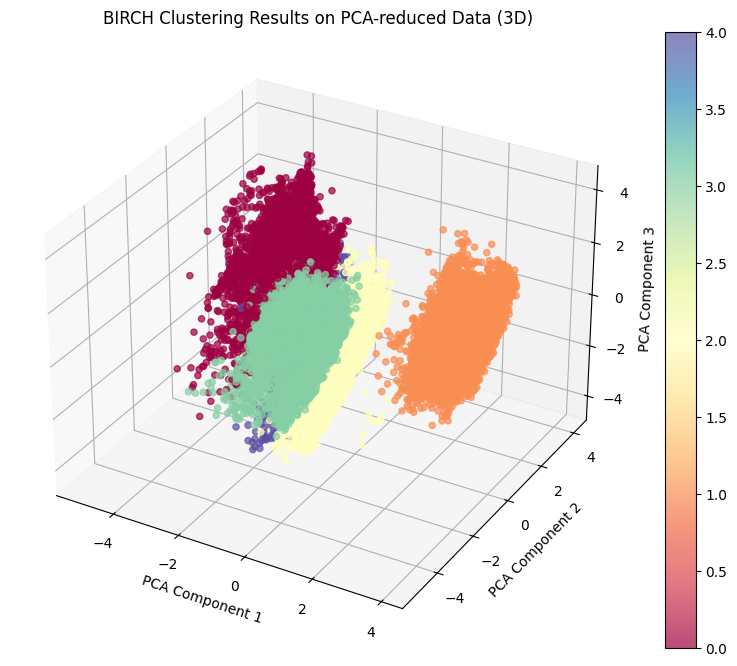


Cluster Characteristics:

Cluster 0:
0   -1.655646
1    0.301646
2    1.261272
3    0.222351
4    0.030153
5   -0.183447
6    0.232780
7   -0.001557
8   -0.008245
dtype: float64

Cluster 1:
0    2.513231
1    0.194621
2    0.161150
3    0.022402
4   -0.025918
5    0.063122
6   -0.182523
7    0.020643
8   -0.141241
dtype: float64

Cluster 2:
0   -0.734129
1    1.125418
2   -2.020294
3    0.071230
4    0.004879
5   -0.324237
6    0.449035
7    0.432194
8   -0.081670
dtype: float64

Cluster 3:
0   -1.137300
1   -1.456130
2    0.092358
3   -0.300894
4    0.061980
5   -0.101042
6   -0.056641
7   -0.033943
8    0.329103
dtype: float64

Cluster 4:
0   -1.868442
1    1.214997
2   -1.750762
3    0.081151
4   -0.279220
5    1.824448
6   -0.818442
7   -1.180692
8   -0.373066
dtype: float64


In [62]:
from sklearn.cluster import Birch
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import pandas as pd

# Apply PCA to reduce data to 3D for visualization
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df)

# Create BIRCH clustering model
birch = Birch(n_clusters=5)  # Adjust clusters as needed

# Fit and predict clusters
clusters = birch.fit_predict(df)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Calculate clustering evaluation metrics
silhouette = silhouette_score(df, clusters)
calinski = calinski_harabasz_score(df, clusters)
davies = davies_bouldin_score(df, clusters)

print("\nClustering Metrics:")
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz Index: {calinski:.3f}")
print(f"Davies-Bouldin Index: {davies:.3f}")

# Print basic clustering information
print(f"\nNumber of clusters: {len(set(clusters))}")
print("\nCluster distribution:")
print(pd.Series(clusters).value_counts().sort_index())

# 3D Visualization of Clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of PCA-reduced data
scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], 
                      c=clusters, cmap='Spectral', alpha=0.7)

ax.set_title('BIRCH Clustering Results on PCA-reduced Data (3D)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.colorbar(scatter)
plt.show()

# Print cluster characteristics
print("\nCluster Characteristics:")
for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(cluster_data.mean().drop('Cluster'))

In [60]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.cluster import Birch
# from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# from sklearn.utils import resample

# # Number of bootstrap iterations
# n_bootstraps = 10  

# # Number of clusters for BIRCH
# n_clusters = 5  

# # Store clustering metrics across bootstraps
# silhouette_scores = []
# calinski_scores = []
# davies_scores = []
# cluster_results = []

# for i in range(n_bootstraps):
#     print(f"Bootstrap Iteration {i+1}/{n_bootstraps}...")

#     # Bootstrap resampling
#     df_sample = resample(df, replace=True, n_samples=len(df))

#     # Create and fit BIRCH model
#     birch = Birch(n_clusters=n_clusters)
#     clusters = birch.fit_predict(df_sample)

#     # Store cluster results
#     cluster_results.append(clusters)

#     # Compute clustering metrics
#     silhouette = silhouette_score(df_sample, clusters)
#     calinski = calinski_harabasz_score(df_sample, clusters)
#     davies = davies_bouldin_score(df_sample, clusters)

#     silhouette_scores.append(silhouette)
#     calinski_scores.append(calinski)
#     davies_scores.append(davies)

# # Compute mean and std for clustering metrics
# print("\nBootstrap Aggregated Metrics:")
# print(f"Silhouette Score: {np.mean(silhouette_scores):.3f} ± {np.std(silhouette_scores):.3f}")
# print(f"Calinski-Harabasz Index: {np.mean(calinski_scores):.3f} ± {np.std(calinski_scores):.3f}")
# print(f"Davies-Bouldin Index: {np.mean(davies_scores):.3f} ± {np.std(davies_scores):.3f}")

# # Visualize clusters from the last bootstrap iteration (for interpretation)
# plt.figure(figsize=(10, 8))
# scatter = plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=cluster_results[-1], cmap='Spectral', alpha=0.6)
# plt.colorbar(scatter)
# plt.title('BIRCH Clustering Results (Last Bootstrap Sample)')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.show()